# Theory: Denitrification Rates

## Background

The nitrogene cycle is mediated by a diverse group of microorganism, of which, only part can be cultivated. Therefore studies on the genome scale models become impractical, while metabolic pathways can become a valid alternative to capture the contribution of the microbial community.

The explicit link between functional genes and denitrification rates has been successfully modelled by Störiko et al. (2021). This  idea is based on the evidence that modern biological molecular techniques can provide key insights into the functioning of microbiological environmental systems <cite id="ze40c"><a href="#zotero%7C13812675%2F67N5Y2HA">(Starke et al., 2019)</a></cite>.

The study of Störiko et al. (2021) is motivated by the fact that incorporating a mechanistic description of transcript to gene expression and gene to concentrations and reaction rates into models, one can better link how transcript concentrations relate to denitrification rates or nitrate concentrations.

This *gene-centric* approach focus on the functions of certain genes instead of modelling specific organisms explicitly. The gene-abundance is used as a proxy for biomass, which can then be integrated into existing biogeochemical models <cite id="4l9me"><a href="#zotero%7C13812675%2F94IXG8XZ">(Reed et al., 2014)</a></cite>.

## Conceptual Model

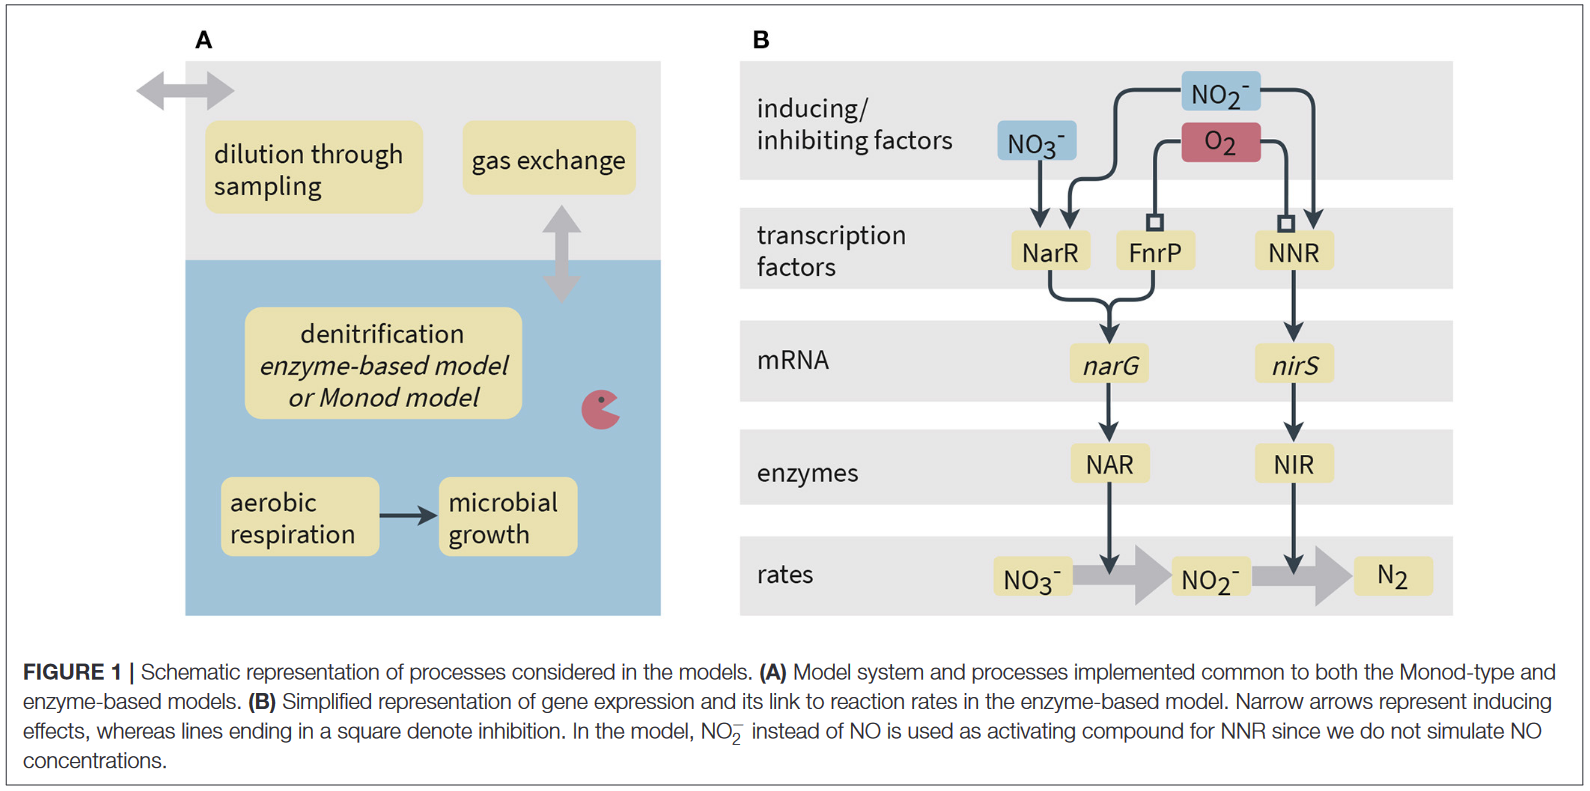

The *narG* gene is involved in the nitrate denitrification, while *nirS* is involved in the reduction of nitrite. The transcriptor factors regulate the transcription of those genes. In the model we consider the following:

* *narG* is activated by NarR and FnrP. NarR is responds to NO3 and NO2. FnrP reacts with O2, which leads to its inhibition.
* *nirS* is activated by NNR. NNR responds to NO and is inactivated by O2. Since this model does not explicitly models NO, NO2 replaces it in the model.

The model was based on the lab batch reactions performed by <cite id="zbflg"><a href="#zotero%7C13812675%2F897EKFA4">(Qu et al., 2016)</a></cite>. In the experiment NO and N2O were less than one percent of the mass balance,  thus their production rates were considered non-limiting.
Therefore the considered model rate-limiting steps are the denitrification of nitrate and nitrite and the reduction of nitrite via NO and N2O to N2 was considered as a single reaction.

Thus, the denitrification reactions are modelled by the following reactions:


1. *denitrification 1*:  
$\ce{7NO3- + C4H6O4 ->[nar] 7NO2- + 4CO2 + 3H2O}$
2. *denitrificantion 2*:  
$\ce{14NO2- + 14H+ + 3C4H6O4 ->[nir] 7N2 + 12CO2 + 16H2O}$
3. *aerobic respiration*:  
$\ce{7O2 + 2C4H6O4 -> 7NO2- + 8CO2 + 6H2O}$

## Mathematical description

### Reaction Rates

The reactions rates can be modelled by Michaelis-Menten kinetic model:

$r_{j} = \nu_{max}^i B \frac{C_{j}}{C_{j} + K_{j}} \frac{I_{reac}^i}{I_{reac}^i + C_{O2}} $

for $j \in (nar, nir)$

the aerobic respiration is also described by another monod term:

$r_{\ce{O2}} = \nu_{\ce{O2}}^i B \frac{C_{\ce{O2}}}{C_{\ce{O2}} + K_{\ce{O2}}} \frac{C_{\ce{DOC}}}{C_{\ce{DOC}} + K_{\ce{DOC}}} $  

However, instead of assigning the reaction rates by the cell concentration, we replace: $\nu_{max}^i B$ by $k_{max}^i E_i$, in which $k_i$ is the turnover number, representing the maximum amount of substracte a syngle enzyme molecule can transform per unit of time and E_i is the concentration of enzymes.

Thus for the enzyme based model the denitrification rates become:

$r_{j} = k_{max}^i E_i \frac{C_{j}}{C_{j} + K_{j}} \frac{I_{reac}^i}{I_{reac}^i + C_{O2}} $

for $j \in (nar, nir)$

### Enzyme description

The enzyme concentration is assumed to be governed by mRNA translation as well as first order decay:

$\frac{dE_i}{dt} = k_{translation}*T_i - k_{dec}*E_i$

quasi steady state concentration of enzymes is necessary to calculate the translation rate:

$E^{qss}_i = \frac{k_{translation}*\beta_T}{k_{dec}^E}*f_{act}*B$  
$E^{qss}_i = \beta_E*f_{act}*B$  
$f_{act}$ is the fraction of active sites for transcript $i$ and $\beta_T$ is the number of transcripts per cell at maximum transcription ($f_{act}$ = 1)

Thus we rewrite for $k_{translation}$

$k_{translation} = \frac{\beta_E}{\beta_T}* k_{dec}^E$

### Transcript description

The translation rate depends on the transcript concentration: $T_i$. Since half-lifes of transcripts are short, they can be described by a quasi-steady state formulation:

$T_i^{qss} = \beta_T*f_{act}*B$  
$dT_i/dt = 0$


### Transcription factors

The transcription factors activate or deactivate the transcription of enzymes.  
The formula to calculate the fraction of operator sites ($f_{act}$) for gene *nar* is:

$f^{nar}_{act} = \frac{X_{FnrP}*X_{NarR}}{1+X_{FnrP}/K_{FnrP}+X_{NarR}/K_{NarR}+X_{FnrP}*X_{NarR}/(K_{FnrP}*K_{NarR})} $ 

Where $X_{NarR}$ and $X_{FnrP}$ are the fractions of active transcription factors and $K_{NarR}$ and $K_{FnrP}$ are the half saturation constants.



$X_{NarR}$ rates can be modelled by the expression:

$\frac{dX_{NarR}}{dt} = \left(a^{no3}*C_{NO3} + a^{no2}*C_{NO2}\right)*(1-X_{NarR})-k_{dec}*X_{NarR}$

While $X_{FnrP}$ is model by a Hill function:

$X_{FnrP} = \frac{I_{FnrP}^p}{I_{FnrP}^p+C_{O2}^p}$

where $p$ is the hill coefficient.

The formula to calculate the fraction of operator sites ($f_{act}$) for gene *nir* is:

$f^{nir}_{act} = \frac{X_{NNR}}{X_{NNR}+K_{NNR}} $ 

The NNR transcript rate can be calculated in a similar way as the previous trancripts, however it is both activate by nitrite and inactivated by O2, thus the calculation takes two steps:

$\frac{d \hat X_{NNR}}{dt} = a_{NNR}*C_{NO2}(1-\hat X_{NNR})-k_{dec}*\hat X_{NNR}$

Where $\hat X_{NNR}$ is the fraction activated by nitrite. The full fraction is then calculated as:

$X_{NNR} = \frac{I_{NNR}^q}{I_{NNR}^q+C_{O2}^q}*\hat X_{NNR}$

Accounting for the O2 inhibition, and Hill coefficient $q$

## References
<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|13812675/897EKFA4"></i>Qu, Z., Bakken, L. R., Molstad, L., Frostegård, Å., &#38; Bergaust, L. L. (2016). Transcriptional and metabolic regulation of denitrification in Paracoccus denitrificans allows low but significant activity of nitrous oxide reductase under oxic conditions. <i>Environmental Microbiology</i>, <i>18</i>(9), 2951–2963. <a href="https://doi.org/10.1111/1462-2920.13128">https://doi.org/10.1111/1462-2920.13128</a></div>
  <div class="csl-entry"><i id="zotero|13812675/94IXG8XZ"></i>Reed, D. C., Algar, C. K., Huber, J. A., &#38; Dick, G. J. (2014). Gene-centric approach to integrating environmental genomics and biogeochemical models. <i>Proceedings of the National Academy of Sciences</i>, <i>111</i>(5), 1879–1884. <a href="https://doi.org/10.1073/pnas.1313713111">https://doi.org/10.1073/pnas.1313713111</a></div>
  <div class="csl-entry"><i id="zotero|13812675/67N5Y2HA"></i>Starke, R., Jehmlich, N., &#38; Bastida, F. (2019). Using proteins to study how microbes contribute to soil ecosystem services: The current state and future perspectives of soil metaproteomics. <i>10 Year Anniversary of Proteomics</i>, <i>198</i>, 50–58. <a href="https://doi.org/10.1016/j.jprot.2018.11.011">https://doi.org/10.1016/j.jprot.2018.11.011</a></div>
</div>
<!-- BIBLIOGRAPHY END -->